# Analyse YOLOv5 results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def ReadResultsCSV(path):
    """
    Read of results.csv files.
    
    Arguments:
    path -- path that saves the file to be read
    
    Returns:
    numeric values -- these values are metrics stored in the file  
    """
    data = pd.read_csv(path + "results.csv", names = headers)
    data = data.values
    
    df = []
    df = pd.DataFrame({'epoch': data[1:, 0],
                       'trainb_loss': data[1:, 1],
                       'trainobj_loss': data[1:, 2],
                       'precision': data[1:, 4],
                       'recall': data[1:, 5],
                       'mAP_0_5': data[1:, 6],
                       'valbloss': data[1:, 8],
                       'valobj_loss': data[1:, 9]})

    df.epoch=pd.to_numeric(df.epoch)
    df.trainb_loss=pd.to_numeric(df.trainb_loss)
    df.trainobj_loss=pd.to_numeric(df.trainobj_loss)
    df.precision=pd.to_numeric(df.precision)
    df.recall=pd.to_numeric(df.recall)
    df.mAP_0_5=pd.to_numeric(df.mAP_0_5)
    df.valbloss=pd.to_numeric(df.valbloss)
    df.valobj_loss=pd.to_numeric(df.valobj_loss)
    
    return df

## Results with train, validation and test  

In [ ]:
path0 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp\\"
path1 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp2\\"
path2 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp3\\"
path3 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp4\\"
path4 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp5\\"
path5 = "C:\\Users\\fabri\\Desktop\\results\\train\\exp6\\"

path = [path0, path1, path2, path3, path4, path5]
save_path = "C:\\Users\\fabri\\Desktop\\results\\"
graph_label = ["15x15", "20x20", "22x22", "25x25", "30x30", "35x35"]

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['epoch','train/box_loss','train/obj_loss','train/cls_loss','metrics/precision','metrics/recall','metrics/mAP_0.5','metrics/mAP_0.5:0.95','val/box_loss','val/obj_loss','val/cls_loss','x/lr0','x/lr1','x/lr2'] 

for i in range(6):
    df = []
    df = ReadResultsCSV(path[i])
    
    plt.figure(1)
    plt.plot(df['epoch'], df['trainb_loss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('train/box_loss')
    plt.legend()        
    plt.savefig(save_path + 'trainb_loss' + str(i) + '.png')
    
    plt.figure(2)
    plt.plot(df['epoch'], df['trainobj_loss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('train_obj_loss')
    plt.legend()
    plt.savefig(save_path + 'trainobj_loss' + str(i) + '.png')
    
    plt.figure(3)
    plt.plot(df['epoch'], df['precision'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('Precision')
    plt.legend()
    plt.savefig(save_path + 'precision' + str(i) + '.png')

    plt.figure(4)
    plt.plot(df['epoch'], df['recall'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('Recall')
    plt.legend()
    plt.savefig(save_path + 'recall' + str(i) + '.png')
    
    plt.figure(5)
    plt.plot(df['epoch'], df['mAP_0_5'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('mAP_0.5')
    plt.legend()
    plt.savefig(save_path + 'mAP_0_5' + str(i) + '.png')
    
    plt.figure(6)
    plt.plot(df['epoch'], df['valbloss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('val_box_loss')
    plt.legend()
    plt.savefig(save_path + 'valbloss' + str(i) + '.png')
    
    plt.figure(7)
    plt.plot(df['epoch'], df['valobj_loss'], label = graph_label[i])
    plt.xlabel("epochs")
    plt.ylabel('val_obj_loss')
    plt.legend()
    plt.savefig(save_path + 'valobj_loss' + str(i) + '.png')
    #plt.show()

plt.show()


## Results with k-fold cross validation

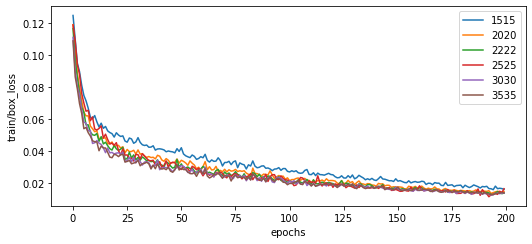

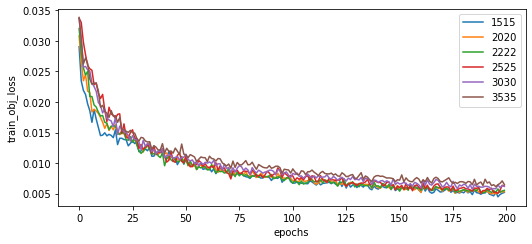

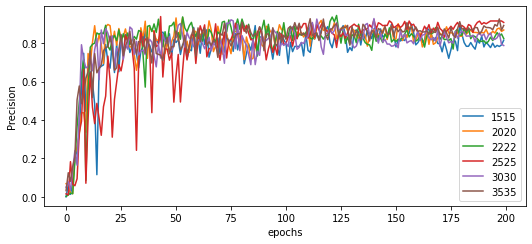

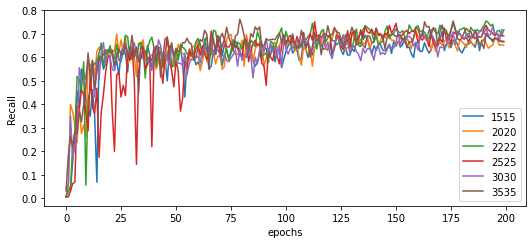

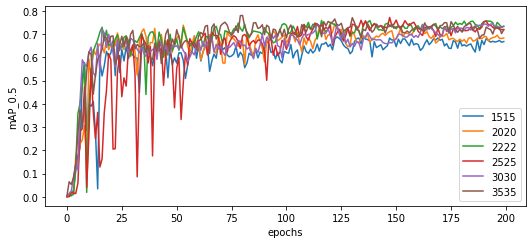

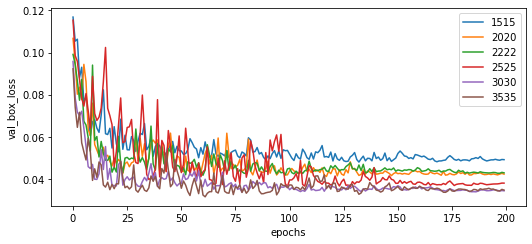

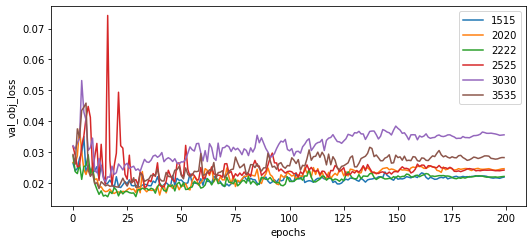

In [3]:
n_folds = 6
number_of_dim = 6 # note that there are 6 dimentions of bounding boxes
dim = ["1515", "2020", "2222", "2525", "3030", "3535"]
       
directory = "C:\\Users\\fabri\\Downloads"

save_path = "C:\\Users\\fabri\\Downloads\\results\\"

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['epoch','train/box_loss','train/obj_loss','train/cls_loss','metrics/precision','metrics/recall','metrics/mAP_0.5','metrics/mAP_0.5:0.95','val/box_loss','val/obj_loss','val/cls_loss','x/lr0','x/lr1','x/lr2'] 

for j in dim:
    path0 = directory + "\\results"+j+"\\trainFolds\\exp\\"
    path1 = directory + "\\results"+j+"\\trainFolds\\exp2\\"
    path2 = directory + "\\results"+j+"\\trainFolds\\exp3\\"
    path3 = directory + "\\results"+j+"\\trainFolds\\exp4\\"
    path4 = directory + "\\results"+j+"\\trainFolds\\exp5\\"
    path5 = directory + "\\results"+j+"\\trainFolds\\exp6\\"
    
    path = [path0, path1, path2, path3, path4, path5]

    if (os.path.exists(save_path) == False):
        os.makedirs(save_path)
    epoch,trainb_loss,trainobj_loss,precision,recall,mAP_0_5,valbloss,valobj_loss=[], [], [], [], [], [] ,[], []
    for i in range(n_folds):
        data = []
        data = ReadResultsCSV(path[i])
        epoch.append(data['epoch'])
        trainb_loss.append(data['trainb_loss'])
        trainobj_loss.append(data['trainobj_loss'])
        precision.append(data['precision'])
        recall.append(data['recall'])
        mAP_0_5.append(data['mAP_0_5'])
        valbloss.append(data['valbloss'])
        valobj_loss.append(data['valobj_loss'])
        
    epoch = (epoch[0]+epoch[1]+epoch[2]+epoch[3]+epoch[4]+epoch[5])/6
    trainb_loss = (trainb_loss[0]+trainb_loss[1]+trainb_loss[2]+trainb_loss[3]+trainb_loss[4]+trainb_loss[5])/6
    trainobj_loss = (trainobj_loss[0]+trainobj_loss[1]+trainobj_loss[2]+trainobj_loss[3]+trainobj_loss[4]+trainobj_loss[5])/6
    precision = (precision[0]+precision[1]+precision[2]+precision[3]+precision[4]+precision[5])/6
    recall = (recall[0]+recall[1]+recall[2]+recall[3]+recall[4]+recall[5])/6
    mAP_0_5 = (mAP_0_5[0]+mAP_0_5[1]+mAP_0_5[2]+mAP_0_5[3]+mAP_0_5[4]+mAP_0_5[5])/6
    valbloss = (valbloss[0]+valbloss[1]+valbloss[2]+valbloss[3]+valbloss[4]+valbloss[5])/6
    valobj_loss = (valobj_loss[0]+valobj_loss[1]+valobj_loss[2]+valobj_loss[3]+valobj_loss[4]+valobj_loss[5])/6

    plt.figure(1)
    plt.plot(data['epoch'], data['trainb_loss'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('train/box_loss')
    plt.legend()        

    plt.figure(2)
    plt.plot(data['epoch'], data['trainobj_loss'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('train_obj_loss')
    plt.legend()

    plt.figure(3)
    plt.plot(data['epoch'], data['precision'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('Precision')
    plt.legend()

    plt.figure(4)
    plt.plot(data['epoch'], data['recall'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('Recall')
    plt.legend()

    plt.figure(5)
    plt.plot(data['epoch'], data['mAP_0_5'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('mAP_0.5')
    plt.legend()

    plt.figure(6)
    plt.plot(data['epoch'], data['valbloss'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('val_box_loss')
    plt.legend()

    plt.figure(7)
    plt.plot(data['epoch'], data['valobj_loss'], label = j)
    plt.xlabel("epochs")
    plt.ylabel('val_obj_loss')
    plt.legend()

plt.figure(1)
plt.savefig(save_path + 'trainb_loss.png')
plt.figure(2)
plt.savefig(save_path + 'trainobj_loss.png')
plt.figure(3)
plt.savefig(save_path + 'precision.png')
plt.figure(4)
plt.savefig(save_path + 'recall.png')
plt.figure(5)
plt.savefig(save_path + 'mAP_0_5.png')
plt.figure(6)
plt.savefig(save_path + 'valbloss.png')
plt.figure(7)
plt.savefig(save_path + 'valobj_loss.png')

plt.show()

    